In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import json
import statsmodels.api as sm
import numpy as np

import matplotlib
import matplotlib.patches as mpatches

%matplotlib notebook

In [55]:
PID = pd.read_csv('MostRecentUpdate/Police_Killings_and_Police_Inolved_Deaths.csv',
                  index_col=['date'],parse_dates=['date'])

FNA = ['first_name','last_name','department','race','gender']
PID[FNA] = PID[FNA].fillna('Not Specified')

# PID.shape




In [56]:

replace_Keys={'Replace_Keys':{
    'Aboriginal':'Indigenous',
    'Household Population For':'N',
    ' - ':' ',
    'Total visible minority population':'Total',
    'Total Household Population for':'N',
    'Total Population':'Population',
},
  'Columns':{},
    
}
with open('Spatial_Data/CensusNames.json', 'w') as fp:
    json.dump(replace_Keys, fp)

In [57]:
# Boundary = 'C:\\Users\\User\\Data-Normalization-Classification\\Inputs\\Canadian_Census_Boundaries_2016.shp'
# CA = gpd.read_file(Boundary)
# CA.geometry = CA.simplify(1000)
# CA.to_file('Spatial_Data/CA_Boundary.shp')

Boundary = 'Spatial_Data/CA_Boundary.shp'
CA = gpd.read_file(Boundary)
can_province_abbrev = {
          'Alberta': 'AB',
          'British Columbia': 'BC',
          'Manitoba': 'MB',
          'New Brunswic': 'NB',
          'New Brunswick': 'NB',
          'Newfoundland and Labrador': 'NL',
          'Northwest Territories': 'NT',
          'Nova Scotia': 'NS',
          'Nunavut': 'NU',
          'Ontario': 'ON',
          'Prince Edward Island': 'PE',
          'Quebec': 'QC',
            'Québec':'QC',
          'Saskatchewan': 'SK',
          'Yukon': 'YT',
            'Yukon Territory':'YT'
        }

CA['Abrev'] = CA['PRNAME'].replace(can_province_abbrev)
# CA['Abrev']

Set = PID.loc[PID.index.year>=2016].copy()
CA = CA.set_index('Abrev')
CA = CA.join(Set.groupby('prov').count()[['INDEX']])
CA = CA.rename(columns={'INDEX':'AllDeath'})
CA = CA.join(Set.loc[Set['Type']=='Police Killing'].groupby('prov').count()[['INDEX']])
CA = CA.rename(columns={'INDEX':'Killing'})
# CA.plot(column='Killing')

In [58]:
with open('Spatial_Data/CensusNames.json', 'r') as fp:
    name_Keys = json.load(fp)
name_Keys
Path = 'Spatial_Data/2016/'
FileName = 'SimplyAnalytics_Shapefiles_2021-10-29_02_33_01_647cde6efbb2fc246c3d34145d589ea7'

Census_2016 = gpd.read_file(Path +FileName+'.shp')
Cols=pd.read_csv(Path+'variable_names.txt',sep='	#',header=None)
Cols['Name']=Cols[1].str.split("|").str[-1].str.split(', ').str[0].str[1:]#.str.replace(name_Keys['Replace_Keys']).values
name_Keys
for old, new in name_Keys['Replace_Keys'].items():
    Cols['Name'] = Cols['Name'].str.replace(old, new, regex=False)
Cols['Name'] = Cols['Name'].str.replace(' ', '_', regex=False)
Cols['Name'] = Cols['Name'].str.lower()

name_Keys['Columns']['2016']={}
for i,row in Cols.iterrows():
    name_Keys['Columns']['2016'][row[0]]=row['Name']
name_Keys

Cols_2016 = list(name_Keys['Columns']['2016'].values())
Census_2016=Census_2016.rename(columns=name_Keys['Columns']['2016'])
Census_2016[Cols_2016].sum()

C:\Users\User\.conda\envs\geo-env\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


indigenous_identity        1673791.0
n_indigenous_identity     34460068.0
females                   17887524.0
males                     17264204.0
population                35151728.0
visible_minority_black     1198540.0
n_visible_minority        34460068.0
visible_minority_total     7674575.0
dtype: float64

In [59]:
with open('Spatial_Data/CensusNames.json', 'r') as fp:
    name_Keys = json.load(fp)
name_Keys
Path = 'Spatial_Data/2019/'
FileName = 'SimplyAnalytics_Shapefiles_2021-10-29_05_22_49_491bf9a4259930aa7a779d25dae4fb09'

Census_2019 = gpd.read_file(Path +FileName+'.shp')
Cols=pd.read_csv(Path+'variable_names.txt',sep='	#',header=None)
Cols['Name']=Cols[1].str.split("|").str[-1].str.split(', ').str[0].str[1:]#.str.replace(name_Keys['Replace_Keys']).values
name_Keys
for old, new in name_Keys['Replace_Keys'].items():
    Cols['Name'] = Cols['Name'].str.replace(old, new, regex=False)
Cols['Name'] = Cols['Name'].str.replace(' ', '_', regex=False)
Cols['Name'] = Cols['Name'].str.lower()

name_Keys['Columns']['2019']={}
for i,row in Cols.iterrows():
    name_Keys['Columns']['2019'][row[0]]=row['Name']
name_Keys

Cols_2019 = list(name_Keys['Columns']['2019'].values())
print(Cols_2019)
Census_2019=Census_2019.rename(columns=name_Keys['Columns']['2019'])
Census_2019[Cols_2019].sum()

['indigenous_identity', 'n_indigenous_identity', 'population', 'females', 'males', 'visible_minority_black', 'n_visible_minority', 'visible_minority_total']


indigenous_identity        1826555.0
n_indigenous_identity     36750837.0
population                37465430.0
females                   18887670.0
males                     18577760.0
visible_minority_black     1527504.0
n_visible_minority        36750837.0
visible_minority_total     9332201.0
dtype: float64

In [60]:

Path = 'Spatial_Data/2021/'
FileName = 'SimplyAnalytics_Shapefiles_2021-10-29_02_33_29_b1bb73ed1b44115f5efc8f2d899d4b13'

Census_2021 = gpd.read_file(Path +FileName+'.shp')
Cols=pd.read_csv(Path+'variable_names.txt',sep='	#',header=None)
Cols['Name']=Cols[1].str.split("|").str[-1].str.split(', ').str[0].str[1:]#.str.replace(name_Keys['Replace_Keys']).values

for old, new in name_Keys['Replace_Keys'].items():
    Cols['Name'] = Cols['Name'].str.replace(old, new, regex=False)
name_Keys['Columns']['2021']={}
for i,row in Cols.iterrows():
    Cols['Name'] = Cols['Name'].str.replace(old, new, regex=False)
Cols['Name'] = Cols['Name'].str.replace(' ', '_', regex=False)
Cols['Name'] = Cols['Name'].str.lower()
    

name_Keys['Columns']['2021']={}
for i,row in Cols.iterrows():
    name_Keys['Columns']['2021'][row[0]]=row['Name']
name_Keys
    
Cols_2021 = list(name_Keys['Columns']['2021'].values())
Census_2021=Census_2021.rename(columns=name_Keys['Columns']['2021'])
# print(Cols_2021)
# with open('Spatial_Data/CensusNames.json', 'w') as fp:
#     json.dump(name_Keys, fp)
# name_Keys
Diff = (Census_2021[Cols_2021].sum().sort_index(ascending=False)-Census_2016[Cols_2021].sum().sort_index(ascending=False))
print(Diff/1e6)

Census_2021['Abrev']=Census_2021['name'].replace(can_province_abbrev)
Census_2021=Census_2021.set_index(Census_2021['Abrev'])

CA = CA.join(Census_2021[Cols_2021])
CA

visible_minority_total    1.839401
visible_minority_black    0.362945
population                2.982502
n_visible_minority        2.948565
n_indigenous_identity     2.948565
males                     1.684095
indigenous_identity       0.190306
females                   1.298407
dtype: float64


,PRUID,PRNAME,PRENAME,PRFNAME,PREABBR,PRFABBR,AREA_LCC,AREA_AEA,Area_Merc,geometry,AllDeath,Killing,indigenous_identity,n_indigenous_identity,population,females,males,visible_minority_black,n_visible_minority,visible_minority_total
Abrev,,,,,,,,,,,,,,,,,,,,
NL,10,Newfoundland and Labrador,Newfoundland and Labrador,Terre-Neuve-et-Labrador,N.L.,T.-N.-L.,397598.0,406998.00,1124050.0,"MULTIPOLYGON (((8307365.589 2582136.711, 83083...",3,3.0,45535.0,506318.0,513653.0,260214.0,253439.0,2817.0,506318.0,13759.0
PE,11,Prince Edward Island,Prince Edward Island,Île-du-Prince-Édouard,P.E.I.,Î.-P.-É.,6023.0,5893.29,12384.0,"MULTIPOLYGON (((8435711.754 1679935.966, 84368...",1,1.0,3663.0,156966.0,160374.0,81288.0,79086.0,950.0,156966.0,9236.0
NS,12,Nova Scotia,Nova Scotia,Nouvelle-Écosse,N.S.,N.-É.,57534.5,55643.30,111891.0,"MULTIPOLYGON (((8470851.646 1624745.011, 84711...",7,5.0,54909.0,963101.0,978623.0,499896.0,478727.0,25412.0,963101.0,74454.0
NB,13,New Brunswic,New Brunswick,Nouveau-Brunswick,N.B.,N.-B.,74525.4,73050.60,154848.0,"MULTIPOLYGON (((8176224.537 1722553.460, 81783...",3,3.0,32145.0,762959.0,779582.0,394491.0,385091.0,9240.0,762959.0,30185.0
QC,24,Quebec,Quebec,Québec,Que.,Qc,1476350.0,1509750.00,4309780.0,"MULTIPOLYGON (((8399709.494 2261445.703, 84007...",74,46.0,205154.0,8357074.0,8565732.0,4284500.0,4281232.0,425227.0,8357074.0,1278498.0
ON,35,Ontario,Ontario,Ontario,Ont.,Ont.,980244.0,986723.00,2448600.0,"MULTIPOLYGON (((6378815.614 2295412.440, 63790...",142,77.0,423416.0,14588977.0,14804681.0,7490941.0,7313740.0,774933.0,14588977.0,4744583.0
MB,46,Manitoba,Manitoba,Manitoba,Man.,Man.,627595.0,649630.00,1979250.0,"MULTIPOLYGON (((6039656.509 2636304.343, 60379...",26,18.0,237073.0,1348547.0,1387557.0,694092.0,693465.0,44149.0,1348547.0,284543.0
SK,47,Saskatchewan,Saskatchewan,Saskatchewan,Sask.,Sask.,632214.0,652385.00,1940680.0,"POLYGON ((5248633.914 2767057.263, 5347441.509...",17,11.0,189415.0,1160414.0,1188823.0,589857.0,598966.0,23169.0,1160414.0,174835.0
AB,48,Alberta,Alberta,Alberta,Alta.,Alb.,639937.0,663251.00,2044880.0,"POLYGON ((5228304.177 2767597.891, 4890689.760...",69,54.0,287431.0,4384756.0,4479459.0,2227586.0,2251873.0,196335.0,4384756.0,1246125.0


In [61]:
Time = 1#(((PID.index.max()-pd.DatetimeIndex([str(Set.index.year.min())+'-01-01']))).days.values[0]/365)
CA['Killing_Rate'] = (CA['Killing']/CA['population']*1e6/Time)
CA['AllDeath_Rate'] = (CA['AllDeath']/CA['population']*1e6/Time)

# CA['Killing_Rate'].sort_values()
CA['AllDeath_Rate'].sort_values()

Abrev
NB      3.848216
NL      5.840519
PE      6.235425
NS      7.152908
QC      8.639075
ON      9.591561
BC     13.593759
SK     14.299858
AB     15.403646
MB     18.737969
YT     23.885731
NT     44.621941
NU    151.373716
Name: AllDeath_Rate, dtype: float64

In [62]:
North_Pop = CA.loc[((CA.population<=1e5)),'population'].sum()
North_Deaths = CA.loc[((CA.population<=1e5)),'AllDeath'].sum()
# North
CA.loc[((CA.population<=1e5)),'AllDeath_Rate'] = North_Deaths/North_Pop*1e6
# CA['population'].sort_values()
# CA[['AllDeath','AllDeath_Rate']].sort_values(by='AllDeath_Rate')
CA

,PRUID,PRNAME,PRENAME,PRFNAME,PREABBR,PRFABBR,AREA_LCC,AREA_AEA,Area_Merc,geometry,...,indigenous_identity,n_indigenous_identity,population,females,males,visible_minority_black,n_visible_minority,visible_minority_total,Killing_Rate,AllDeath_Rate
Abrev,,,,,,,,,,,,,,,,,,,,,
NL,10,Newfoundland and Labrador,Newfoundland and Labrador,Terre-Neuve-et-Labrador,N.L.,T.-N.-L.,397598.0,406998.00,1124050.0,"MULTIPOLYGON (((8307365.589 2582136.711, 83083...",...,45535.0,506318.0,513653.0,260214.0,253439.0,2817.0,506318.0,13759.0,5.840519,5.840519
PE,11,Prince Edward Island,Prince Edward Island,Île-du-Prince-Édouard,P.E.I.,Î.-P.-É.,6023.0,5893.29,12384.0,"MULTIPOLYGON (((8435711.754 1679935.966, 84368...",...,3663.0,156966.0,160374.0,81288.0,79086.0,950.0,156966.0,9236.0,6.235425,6.235425
NS,12,Nova Scotia,Nova Scotia,Nouvelle-Écosse,N.S.,N.-É.,57534.5,55643.30,111891.0,"MULTIPOLYGON (((8470851.646 1624745.011, 84711...",...,54909.0,963101.0,978623.0,499896.0,478727.0,25412.0,963101.0,74454.0,5.109220,7.152908
NB,13,New Brunswic,New Brunswick,Nouveau-Brunswick,N.B.,N.-B.,74525.4,73050.60,154848.0,"MULTIPOLYGON (((8176224.537 1722553.460, 81783...",...,32145.0,762959.0,779582.0,394491.0,385091.0,9240.0,762959.0,30185.0,3.848216,3.848216
QC,24,Quebec,Quebec,Québec,Que.,Qc,1476350.0,1509750.00,4309780.0,"MULTIPOLYGON (((8399709.494 2261445.703, 84007...",...,205154.0,8357074.0,8565732.0,4284500.0,4281232.0,425227.0,8357074.0,1278498.0,5.370236,8.639075
ON,35,Ontario,Ontario,Ontario,Ont.,Ont.,980244.0,986723.00,2448600.0,"MULTIPOLYGON (((6378815.614 2295412.440, 63790...",...,423416.0,14588977.0,14804681.0,7490941.0,7313740.0,774933.0,14588977.0,4744583.0,5.201058,9.591561
MB,46,Manitoba,Manitoba,Manitoba,Man.,Man.,627595.0,649630.00,1979250.0,"MULTIPOLYGON (((6039656.509 2636304.343, 60379...",...,237073.0,1348547.0,1387557.0,694092.0,693465.0,44149.0,1348547.0,284543.0,12.972440,18.737969
SK,47,Saskatchewan,Saskatchewan,Saskatchewan,Sask.,Sask.,632214.0,652385.00,1940680.0,"POLYGON ((5248633.914 2767057.263, 5347441.509...",...,189415.0,1160414.0,1188823.0,589857.0,598966.0,23169.0,1160414.0,174835.0,9.252849,14.299858
AB,48,Alberta,Alberta,Alberta,Alta.,Alb.,639937.0,663251.00,2044880.0,"POLYGON ((5228304.177 2767597.891, 4890689.760...",...,287431.0,4384756.0,4479459.0,2227586.0,2251873.0,196335.0,4384756.0,1246125.0,12.055027,15.403646


<IPython.core.display.Javascript object>


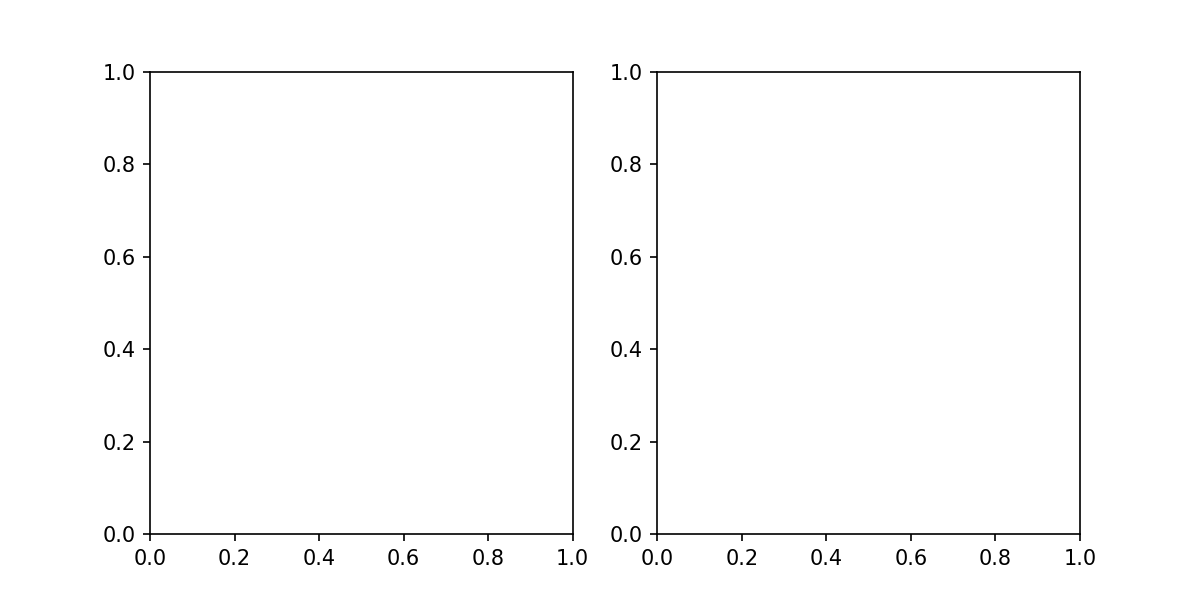

In [94]:

fig,axes=plt.subplots(1,2,figsize=(8,4))
# fig,axes=plt.subplots(2,2,figsize=(10,10))

In [93]:
# Plots = (axes[0,0],axes[0,1],axes[1,0],axes[1,1])
# columns = ['AllDeath','Killing','AllDeath_Rate','Killing_Rate']
# Titles = ['Police Involved Deaths','Police Killings','Police Involved Death Rate','Police Killing Rate']
Plots = [axes[0],axes[1]]
columns = ['AllDeath','AllDeath_Rate']
Titles = ['Police Involved Deaths Since 2016','Deaths per Million Residents']

Break = '_MB'


Totals = [0,10,50,100,150]
Totals_L = ['1-7','17-26','69-74','142']
Rates = [0,5,10,20,200]
Rates_L = ['<5','5-10','10-20','>20']
# Totals = [0,25,100,200,500
# Totals_L = ['<=25','26-100','101-200','>200']
# Rates = [0,.5,1,2,100]
# Rates_L = ['<=0.5','>0.5-1.0','>1.0-2.0','>2.0']

Manual_Bins_list = {'AllDeath':Totals,
                    'Killing':Totals,
                    'AllDeath_Rate':Rates,
                    'Killing_Rate':Rates}
Manual_Labels_list = {'AllDeath':Totals_L,
                    'Killing':Totals_L,
                    'AllDeath_Rate':Rates_L,
                    'Killing_Rate':Rates_L}
quantiles=4
for Title, column,ax in zip(Titles, columns,Plots):
    Map_Col=column+Break
    if column.split('_')[-1]=='Rate':
        CA[Map_Col] = pd.qcut(CA[column],
                q=quantiles,
                duplicates='drop'
                           ).apply(lambda x: pd.Interval(left=(round(x.left,1)), right=(round(x.right,1))))

    else:
        CA[Map_Col] = pd.qcut(CA[column],
                q=quantiles,
                duplicates='drop'
                           ).apply(lambda x: pd.Interval(left=int(round(x.left,1)), right=int(round(x.right,1))))

    if Break == '_MB':
        CA[Map_Col] = pd.cut(CA[column],
                                    bins=Manual_Bins_list[column],
                                    labels=Manual_Labels_list[column],
                                    include_lowest=True,
                                    duplicates='drop'
                                               )
        
    labels=CA[Map_Col].unique().sort_values()
    print(labels)

#     colors=['#fef0d9',#'#fdcc8a',
#             '#fc8d59',#'#e34a33',
#             '#b30000']
    colors=[
    '#fef0d9',
    '#fdcc8a',
    '#fc8d59',
    '#d7301f',
    ]
    Combined_Color = {key:value for key,value in zip(labels,colors)}

    Combined_Patches = []
    labels=CA[Map_Col].unique().sort_values()
    print()

    for i,klass in enumerate(CA[Map_Col].unique().sort_values()):
#         print(klass)
#     #     try:
#         print(i)
#         print(str(labels[i])[0])
        if i == 5:
            kwargs = {'facecolor':Combined_Color[klass],
                     'edgecolor':'black',
                     'linewidth':.5,
                     'label':'> '+str(labels[i])}
        elif i == 0:
            kwargs = {'facecolor':Combined_Color[klass],
                     'edgecolor':'black',
                     'linewidth':.5,
                     'label':str(labels[i])}
        else:
            kwargs = {'facecolor':Combined_Color[klass],
                     'edgecolor':'black',
                     'linewidth':.5,
                     'label':str(labels[i])}
    # #     print(Data.Combined.loc[Data.Combined[Rate+'_Rate_MB']==klass].index)
        CA.loc[CA[Map_Col]==klass].plot(
            ax=ax,
            **kwargs
                 )
        Combined_Patches.append(mpatches.Patch(**kwargs))
    #     except:
    #         pass

    # #     print(Combined_Patches)
    if column.split('_')[-1]=='Rate':
        ax.legend(handles=(Combined_Patches), loc='upper right')#,title='Rate')
    else:
        ax.legend(handles=(Combined_Patches), loc='upper right')#,title='Total')

    plt.tight_layout()

    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title(Title,loc='left')#: January 2000 - Present\
# plt.suptitle('Police Involved Deaths (Since 2016)')

# CA.loc[CA[Map_Col]==klass]
axes[0].text(0,-0.1, "Data Source: https://github.com/PID-CA/Data", size=10, ha="left", 
         transform=axes[0].transAxes)
axes[1].text(0,-0.1, "Map Created By: June Skeeter (Nov 1, 2021)", size=10, ha="left", 
         transform=axes[1].transAxes)

plt.savefig('docs/PID_by_Prov.png',dpi=400)


['1-7', '17-26', '69-74', '142']
Categories (4, object): ['1-7' < '17-26' < '69-74' < '142']

['<5', '5-10', '10-20', '>20']
Categories (4, object): ['<5' < '5-10' < '10-20' < '>20']



In [15]:
name_Keys['Pop_Trend']={}
# X = sm.add_constant(X)
for c in Cols_2021:
    Y = [Census_2016[c].sum(),Census_2019[c].sum(),Census_2021[c].sum()]
    if c == 'population':
        X = [2016,2019,2021,2011,2006,2001]
        for v in [33476688,31612897,30007094]:
            Y.append(v)
    else:
        X = [2016,2019,2021]
    X = sm.add_constant(X)
#     print(X,Y)
        
    model = sm.OLS(Y,X)
    results = model.fit()
    name_Keys['Pop_Trend'][c]=results.params#[1]
# print(name_Keys['Pop_Trend'])

In [16]:
Daily = PID.groupby(PID.index).count().resample('D').asfreq()
Daily['Days']=1
# print(Daily)
Yearly = Daily.resample('Y').count()
# print(Yearly)
Scale = 1e6
Days = Yearly['Days'].max()
Death_Rate = []
Killing_Rate = []
Years = []
for y in range(2000,2022):
    Length = (Days/Yearly.loc[Yearly.index.year==y,'Days'].values[0])
    Years.append(str(y)+'-1-1')
    PM=((y*name_Keys['Pop_Trend']['population'][1]+name_Keys['Pop_Trend']['population'][0])/Scale)
    Death_Rate.append(((Yearly.loc[Yearly.index.year==y,'INDEX']/PM).values*Length)[0])
    
Daily = PID.loc[PID['Type']=='Police Killing'].groupby(PID.loc[PID['Type']=='Police Killing'].index).count().resample('D').asfreq()
Daily['Days']=1
Yearly = Daily.resample('Y').count()
Scale = 1e6
Days = Yearly['Days'].max()
for y in range(2000,2022):
    Length = (Days/Yearly.loc[Yearly.index.year==y,'Days'].values[0])
    PM=((y*name_Keys['Pop_Trend']['population'][1]+name_Keys['Pop_Trend']['population'][0])/Scale)
    Killing_Rate.append(((Yearly.loc[Yearly.index.year==y,'INDEX']/PM).values*Length)[0])
print(len(Years))    
Rate = pd.DataFrame(data={'date':Years,'PID_Rate':Death_Rate,'Killing_Rate':Killing_Rate})
# print(Rate)
Rate = Rate.set_index(pd.DatetimeIndex(Rate['date']))
# Rate

22


date
1987-01-20    Police Involved Death
1987-02-02    Police Involved Death
1987-02-08    Police Involved Death
1987-04-05    Police Involved Death
1987-04-16    Police Involved Death
                      ...          
2011-08-15           Police Killing
2013-02-15    Police Involved Death
2019-12-29           Police Killing
2020-10-04           Police Killing
2020-10-08           Police Killing
Name: Type, Length: 1376, dtype: object


<IPython.core.display.Javascript object>


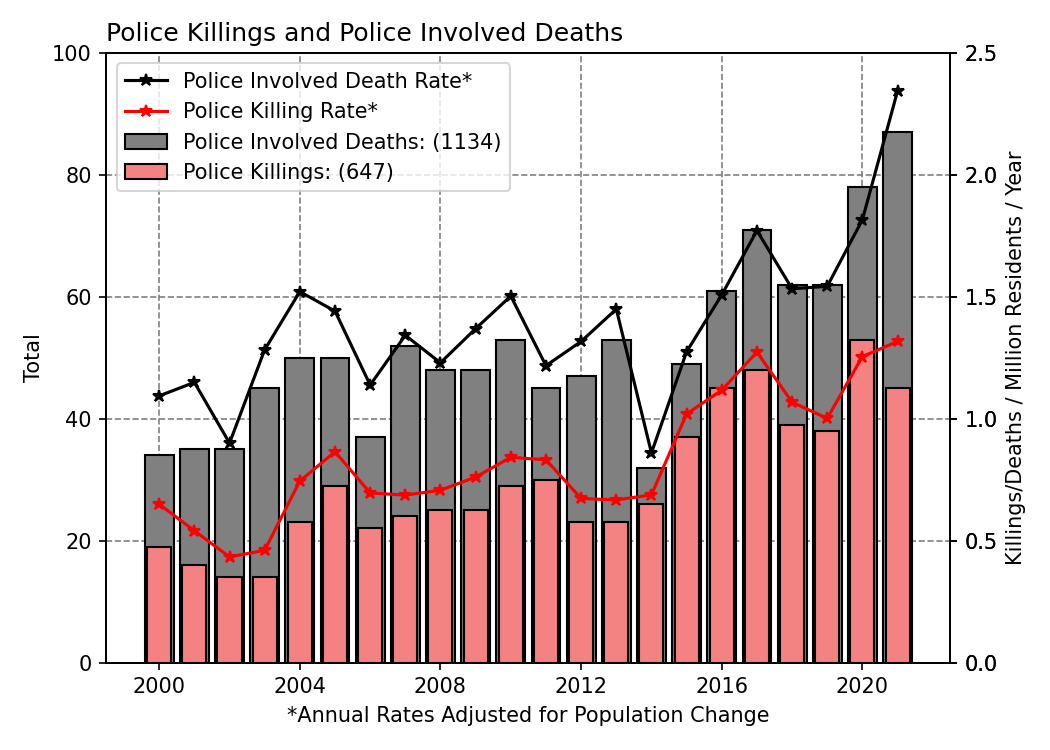

In [18]:
Class = 'Type'
print(PID['Type'])
# print(PID.loc[((PID.index.year>=2000))])
fig,ax=plt.subplots(1,figsize=(7,5))


Y = PID.loc[((PID.index.year>=2000))].resample('YS').count()['INDEX']
ax.bar(Y.index,Y,width = 300,edgecolor='k',facecolor='grey',label='Police Involved Deaths: ('+str(Y.sum())+')')
x2=ax.twinx()
x2.plot(Rate['PID_Rate'],color='k',marker='*',label='Police Involved Death Rate*')
ax.plot(Rate['PID_Rate']*np.nan,color='k',marker='*',label='Police Involved Death Rate*')
x2.set_ylim(0,2.5)
# ax.set_title('All Police Involved Deaths')




Y = PID.loc[((PID.index.year>=2000)&
            (PID.Type=='Police Killing'))].resample('YS').count()['INDEX']
ax.bar(Y.index,Y,width = 250,edgecolor='k',facecolor='#f58282',label='Police Killings: ('+str(Y.sum())+')' )
x2=ax.twinx()
x2.plot(Rate['Killing_Rate'],color='#ff0000',marker='*',label='Police Killing Rate*')
ax.plot(Rate['Killing_Rate']*np.nan,color='#ff0000',marker='*',label='Police Killing Rate*')
x2.set_ylim(0,2.5)
ax.set_ylim(0,100)
ax.set_axisbelow(True)
ax.grid(color='grey', linestyle='--')
ax.set_ylabel('Total')
x2.set_ylabel('Killings/Deaths / Million Residents / Year')
ax.legend()
ax.set_title('Police Killings and Police Involved Deaths',loc='left')
ax.set_xlabel('*Annual Rates Adjusted for Population Change')
plt.tight_layout()
plt.savefig('docs/Annual.png',dpi=400)

Index(['Other Killings', 'Traffic Incident', 'Other Deaths', 'Shooting'], dtype='object', name='circumstances_of_death')
<bound method Series.sort_values of circumstances_of_death
Other Deaths        315
Other Killings      166
Shooting            469
Traffic Incident    184
Name: INDEX, dtype: int64>


<IPython.core.display.Javascript object>


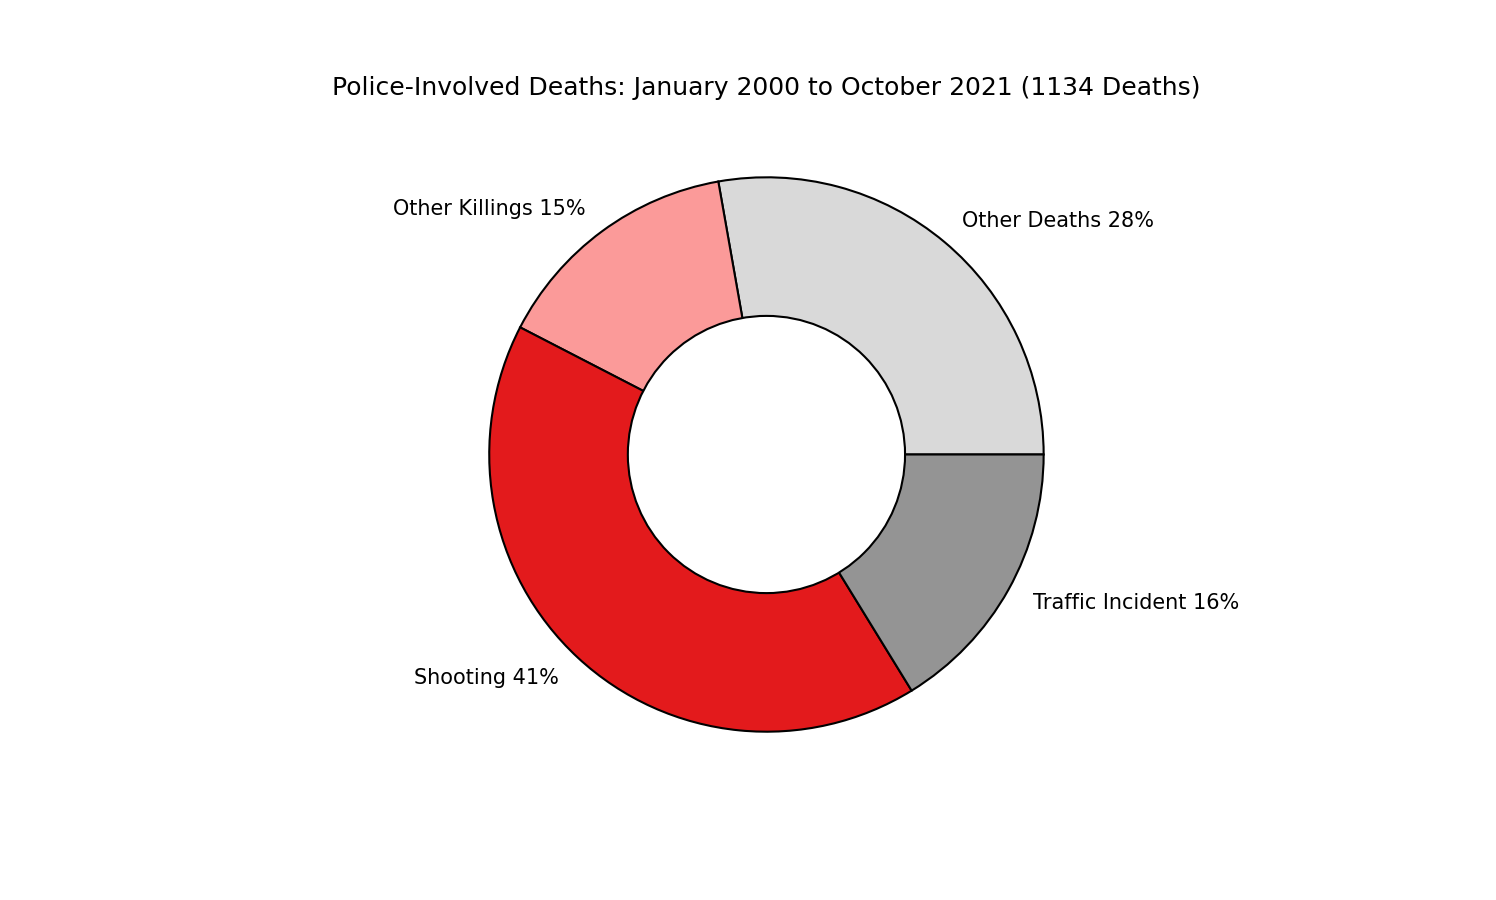

In [223]:

def Doughnut(Set,Colors,ax):
    names = []
    size = []
    colors = []
    if Colors == 'Random':
        for a,s in zip(Set.index.values,Set.values):
            names.append(a+' '+str(int(np.round(s/np.sum(Set.values)*100,0)))+'%')
            size.append(s)
            colors.append(np.random.rand(3))
    else:
        for a,s in zip(Set.index.values,Set.values):
            names.append(a+' '+str(int(np.round(s/np.sum(Set.values)*100,0)))+'%')
            size.append(s)
            colors.append(Colors[a])
    my_circle=plt.Circle( (0,0), 0.5, facecolor='white',edgecolor='k')
    ax.pie(size, labels=names, colors=colors,wedgeprops={"edgecolor":"k"})
    ax.add_artist(my_circle)

Final_Data = PID.loc[PID.index.year>=2000].copy()

Final_Data['cause_death'] = Final_Data['cause_death'].fillna('')


Rep = {
       'Starlight Tour':'Other Killings', 
       'Post-Intervention':'Other Deaths', 
       'Dangerous Driving':'Traffic Incident',
       'Police Involved Death':'Other Deaths', 
       'Off-Duty/Retired':'Other Deaths', 
       'Pursuit':'Traffic Incident',
       'Intervention':'Other Deaths', 
       'Use of Force':'Other Killings',
       'In Custody':'Other Deaths',
      }

Final_Data['circumstances_of_death'] = Final_Data['circumstances_of_death'].replace(Rep)

Death_Cat=Final_Data.groupby('circumstances_of_death').count()['INDEX']

print(Death_Cat.sort_values().index)

Color_Scheme = {'Shooting':'#e31a1c','Other Killings':'#fb9a99','Other Deaths':'#d9d9d9',
#                 'In Custody':'#a6cee3',
                'Traffic Incident':'#949494'}


Death_Cat=Final_Data.groupby('circumstances_of_death').count()['INDEX']

print(Death_Cat.sort_values)



fig,ax=plt.subplots(1,1,figsize = (6.65,4))
Doughnut(Death_Cat,Color_Scheme,ax)
ax.set_title('Police-Involved Deaths: January 2000 to October 2021 ('+str(Death_Cat.sum())+' Deaths)')

plt.savefig('docs/images/Distribtution.png',dpi=400)

<IPython.core.display.Javascript object>


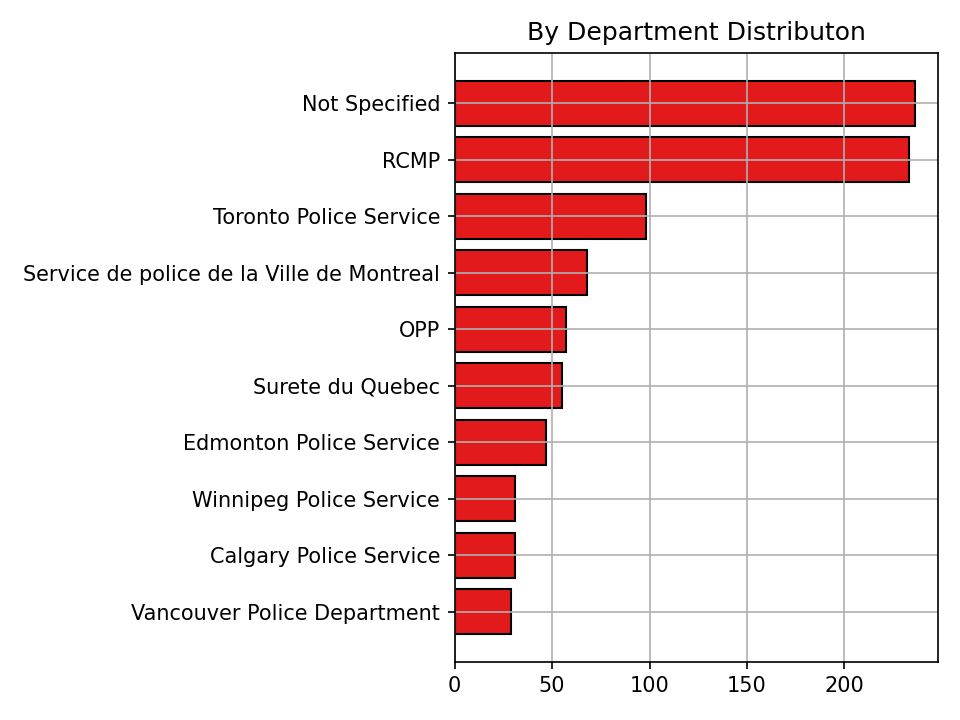

In [246]:
# PID.groupby('first_name').count()['INDEX']
B = Final_Data.groupby('department').count()['INDEX'].sort_values()[-10:]

fig,ax=plt.subplots()
ax.barh(B.index,B,color='#e31a1c',edgecolor='k')
ax.grid()
ax.set_title('By Department Distributon')
plt.tight_layout()

plt.savefig('docs/images/Departments.png',dpi=400)

<IPython.core.display.Javascript object>


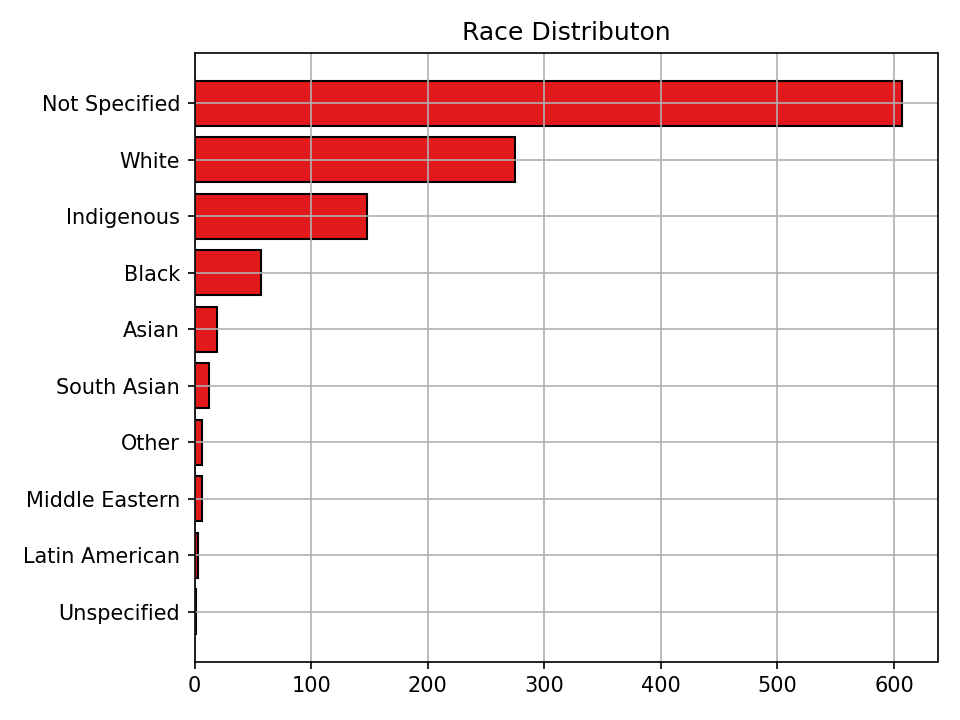

In [245]:
# PID.groupby('first_name').count()['INDEX']
B = Final_Data.groupby('race').count()['INDEX'].sort_values()[-10:]

fig,ax=plt.subplots()
ax.barh(B.index,B,color='#e31a1c',edgecolor='k')
ax.grid()
plt.tight_layout()

ax.set_title('Race Distributon')
plt.tight_layout()
plt.savefig('docs/images/Race.png',dpi=400)

<IPython.core.display.Javascript object>


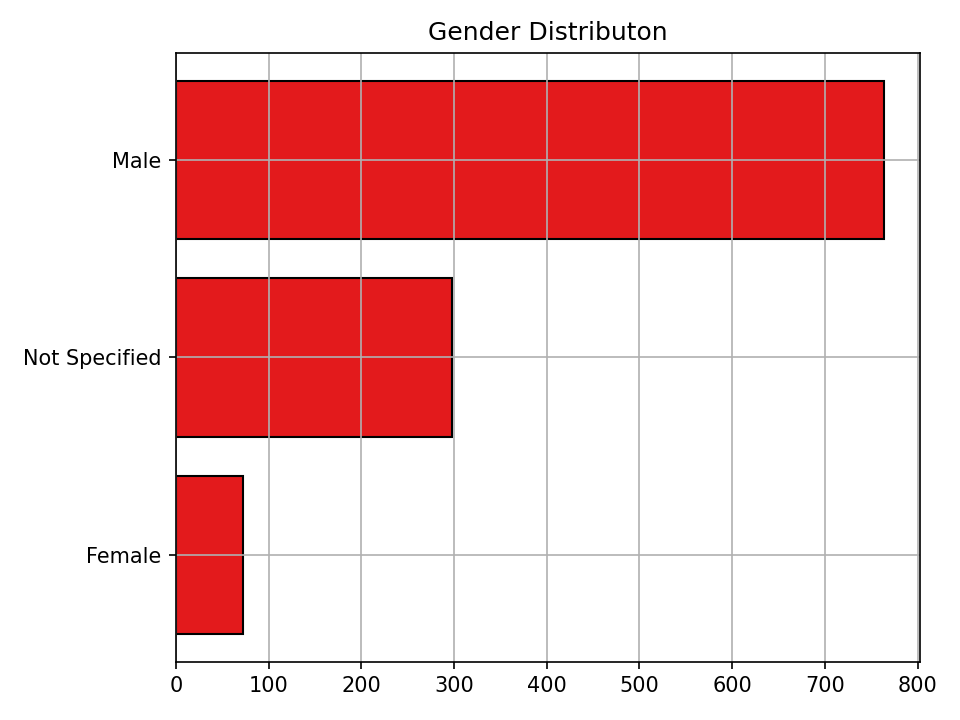

In [244]:
# PID.groupby('first_name').count()['INDEX']
Final_Data['gender']=Final_Data['gender'].replace({'Trans Female':'Female'})
B = Final_Data.groupby('gender').count()['INDEX'].sort_values()[-10:]

fig,ax=plt.subplots()
ax.barh(B.index,B,color='#e31a1c',edgecolor='k')
ax.grid()
# plt.tight_layout()
ax.set_title('Gender Distributon')
plt.tight_layout()

plt.savefig('docs/images/Gender.png',dpi=400)

<IPython.core.display.Javascript object>


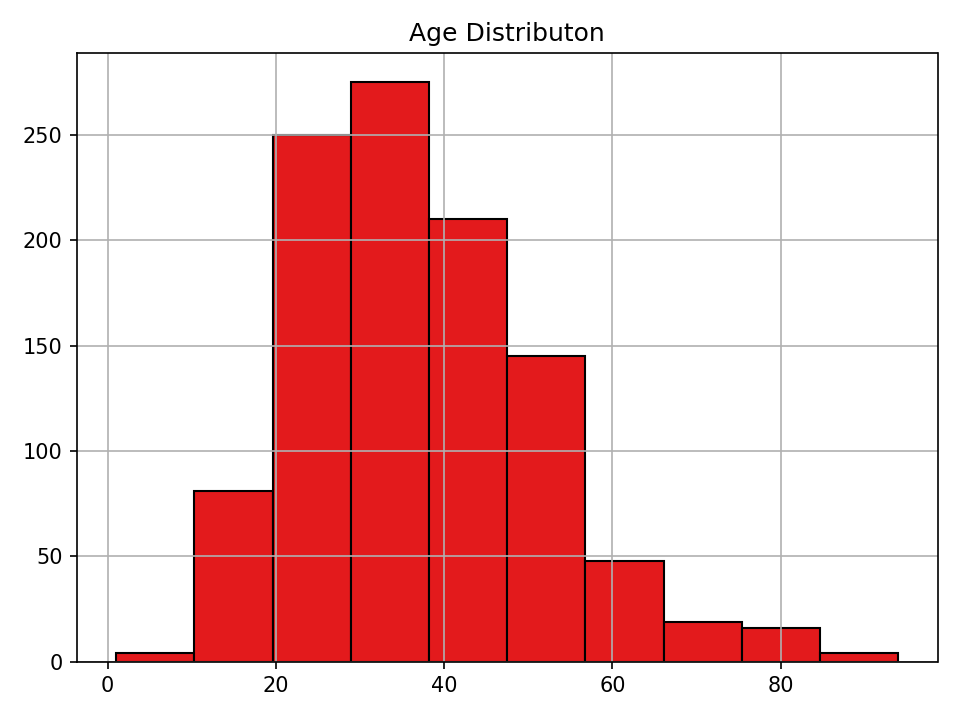

In [243]:
# PID.groupby('first_name').count()['INDEX']
Final_Data['gender']=Final_Data['gender'].replace({'Trans Female':'Female'})
B = Final_Data.groupby('gender').count()['INDEX'].sort_values()[-10:]

fig,ax=plt.subplots()
ax.hist(Final_Data['age'],color='#e31a1c',edgecolor='k')
ax.grid()
plt.tight_layout()
ax.set_title('Age Distributon')
plt.tight_layout()
plt.savefig('docs/images/age.png',dpi=400)

In [5]:
Year = [2000,2010,2016]
Year = [2021]
Pop = 38

for y in Year:

    Set = PID.loc[PID.index.year>=y]
    print('Deaths Since ',y, ':',Set.count()['INDEX'])
    print('Rate:',Set.count()['INDEX']/38/(2021-y))
    print()
    
    print('Killings Since ',y, ':',(Set.groupby('Type').count()['INDEX'])[1:].values[0])
#     print()
    print('Rate: ',(Set.groupby('Type').count()['INDEX']/Pop/(280/365))[1:].values[0])
    print()
    print()
# print(Set.groupby('Type').count()['INDEX'].sort_values())

Deaths Since  2021 : 86
Rate: inf

Killings Since  2021 : 45
Rate:  1.543703007518797




C:\Users\User\AppData\Local\Temp/ipykernel_25664/3795000982.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  print('Rate:',Set.count()['INDEX']/38/(2021-y))


In [69]:
Set.groupby('prov').count()['INDEX'].sort_values()

prov
PE      1
YT      1
NT      2
NB      3
NL      3
NU      6
NS      7
SK     17
MB     26
AB     69
BC     70
QC     74
ON    141
Name: INDEX, dtype: int64

In [66]:
Set.groupby('gender').count()['INDEX']/(Pop/2)/(2021-y)

gender
Female           0.557895
Male             3.789474
Not Specified    0.073684
Name: INDEX, dtype: float64

In [35]:


PID.groupby(['first_name']).count()['INDEX'].sort_values()#.unstack()

first_name
Aaron              1
Marissa            1
Marielle           1
Maria              1
Marcellus          1
                ... 
Daniel            16
Robert            17
Michael           17
David             20
Not Specified    222
Name: INDEX, Length: 615, dtype: int64

In [27]:
PID.groupby(['race']).count()['INDEX'].sort_values()#.unstack()

race
Unspecified         1
indegenous          1
Latin American      3
Middle Eastern      6
Other               6
South Asian        12
Asian              19
Black              57
Indigenous        163
White             276
Not Specified     831
Name: INDEX, dtype: int64

In [21]:
# T=PID.loc[((PID.index.year==2021)&(PID.index.month==9))
# PID['Date']=PID.index.values
PID[PID[['age','gender','department','Date','prov','city_town','first_name']].duplicated().values]

,INDEX,id_victim,first_name,last_name,middle_name,age,gender,race,prov,department,...,charge_type,extra_source,Comp,id_incident,ds_rank,alias_nickname,KCC_posts,cirucmstances_of_death,summary,Date
date,,,,,,,,,,,,,,,,,,,,,
2021-09-27,1233,NaN,NaN,NaN,NaN,62,Male,Not Specified,QC,Sûreté du Québec,...,NaN,NaN,0.5,NaN,NaN,NaN,1954_KCC,NaN,NaN,2021-09-27
2021-09-27,1234,NaN,NaN,NaN,NaN,62,Male,Not Specified,QC,Sûreté du Québec,...,NaN,NaN,0.5,NaN,NaN,NaN,1954_KCC,NaN,NaN,2021-09-27
2021-09-27,1235,NaN,NaN,NaN,NaN,62,Male,Not Specified,QC,Sûreté du Québec,...,NaN,NaN,0.5,NaN,NaN,NaN,1954_KCC,NaN,NaN,2021-09-27
2021-09-27,1236,NaN,NaN,NaN,NaN,62,Male,Not Specified,QC,Sûreté du Québec,...,NaN,NaN,0.5,NaN,NaN,NaN,1954_KCC,NaN,NaN,2021-09-27
2021-09-27,1237,NaN,NaN,NaN,NaN,62,Male,Not Specified,QC,Sûreté du Québec,...,NaN,NaN,0.5,NaN,NaN,NaN,1954_KCC,NaN,NaN,2021-09-27
2021-09-27,1238,NaN,NaN,NaN,NaN,62,Male,Not Specified,QC,Sûreté du Québec,...,NaN,NaN,0.5,NaN,NaN,NaN,1954_KCC,NaN,NaN,2021-09-27
2021-09-27,1239,NaN,NaN,NaN,NaN,62,Male,Not Specified,QC,Sûreté du Québec,...,NaN,NaN,0.5,NaN,NaN,NaN,1954_KCC,NaN,NaN,2021-09-27
2021-09-27,1240,NaN,NaN,NaN,NaN,62,Male,Not Specified,QC,Sûreté du Québec,...,NaN,NaN,0.5,NaN,NaN,NaN,1954_KCC,NaN,NaN,2021-09-27
2021-09-27,1241,NaN,NaN,NaN,NaN,62,Male,Not Specified,QC,Sûreté du Québec,...,NaN,NaN,0.5,NaN,NaN,NaN,1954_KCC,NaN,NaN,2021-09-27


In [ ]:
def Doughnut(Set,Colors,ax):
    names = []
    size = []
    colors = []
    if Colors == 'Random':
        for a,s in zip(Set.index.values,Set.values):
            names.append(a+' '+str(int(np.round(s/np.sum(Set.values)*100,0)))+'%')
            size.append(s)
            colors.append(np.random.rand(3))
    else:
        for a,s in zip(Set.index.values,Set.values):
            names.append(a+' '+str(int(np.round(s/np.sum(Set.values)*100,0)))+'%')
            size.append(s)
            colors.append(Colors[a])
    my_circle=plt.Circle( (0,0), 0.5, facecolor='white',edgecolor='k')
    ax.pie(size, labels=names, colors=colors,wedgeprops={"edgecolor":"k"})
    ax.add_artist(my_circle)

Color_Scheme = {'Shooting':'#a6cee3','Use of Force':'#1f78b4','Other':'#b2df8a',
            'Off-Duty/Retired':'#33a02c'}

Color_Scheme = {'Shooting':'#a6cee3','Use of Force':'#1f78b4','Other':'#b2df8a',
            'Off-Duty/Retired':'#33a02c','Overdose':'#fb9a99','Suicide':'#e31a1c'}

#e31a1c

Data.CA_PoliceKillings['DEATH CATEGORY'].fillna('Other')
Death_Cat=Data.CA_PoliceKillings.groupby('DEATH CATEGORY').count()['NAME FIRST']
# print(Data.CA_PoliceKillings.index.date.min())
# print()

# Data.CA_PoliceKillings['DEATH CATEGORY'].fillna('Other')
Death_Cat=Final_Data.groupby('DEATH CATEGORY').count()['name']

print(Death_Cat)



fig,ax=plt.subplots(1,1,figsize = (6.65,4))
Doughnut(Death_Cat,Color_Scheme,ax)
ax.set_title('Police-Involved Deaths: January 2000 to June 2021 ('+str(Death_Cat.sum())+' Deaths)')

plt.savefig('Content/DeathsDistribution.png')